In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings

warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
raw_data = pd.read_csv(r"C:\Users\sushu\OneDrive\Desktop\HOUSEPRICCE_REGRESSION\dataset.csv")
print(raw_data.columns)
raw_data.head()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
raw_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
raw_data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Convert 'date' column to datetime
raw_data['date'] = pd.to_datetime(raw_data['date'])

# Extract relevant date features (optional)
raw_data['year'] = raw_data['date'].dt.year
raw_data['month'] = raw_data['date'].dt.month
raw_data['day'] = raw_data['date'].dt.day

# Drop the original 'date' column if not needed
# raw_data.drop('date', axis=1, inplace=True)



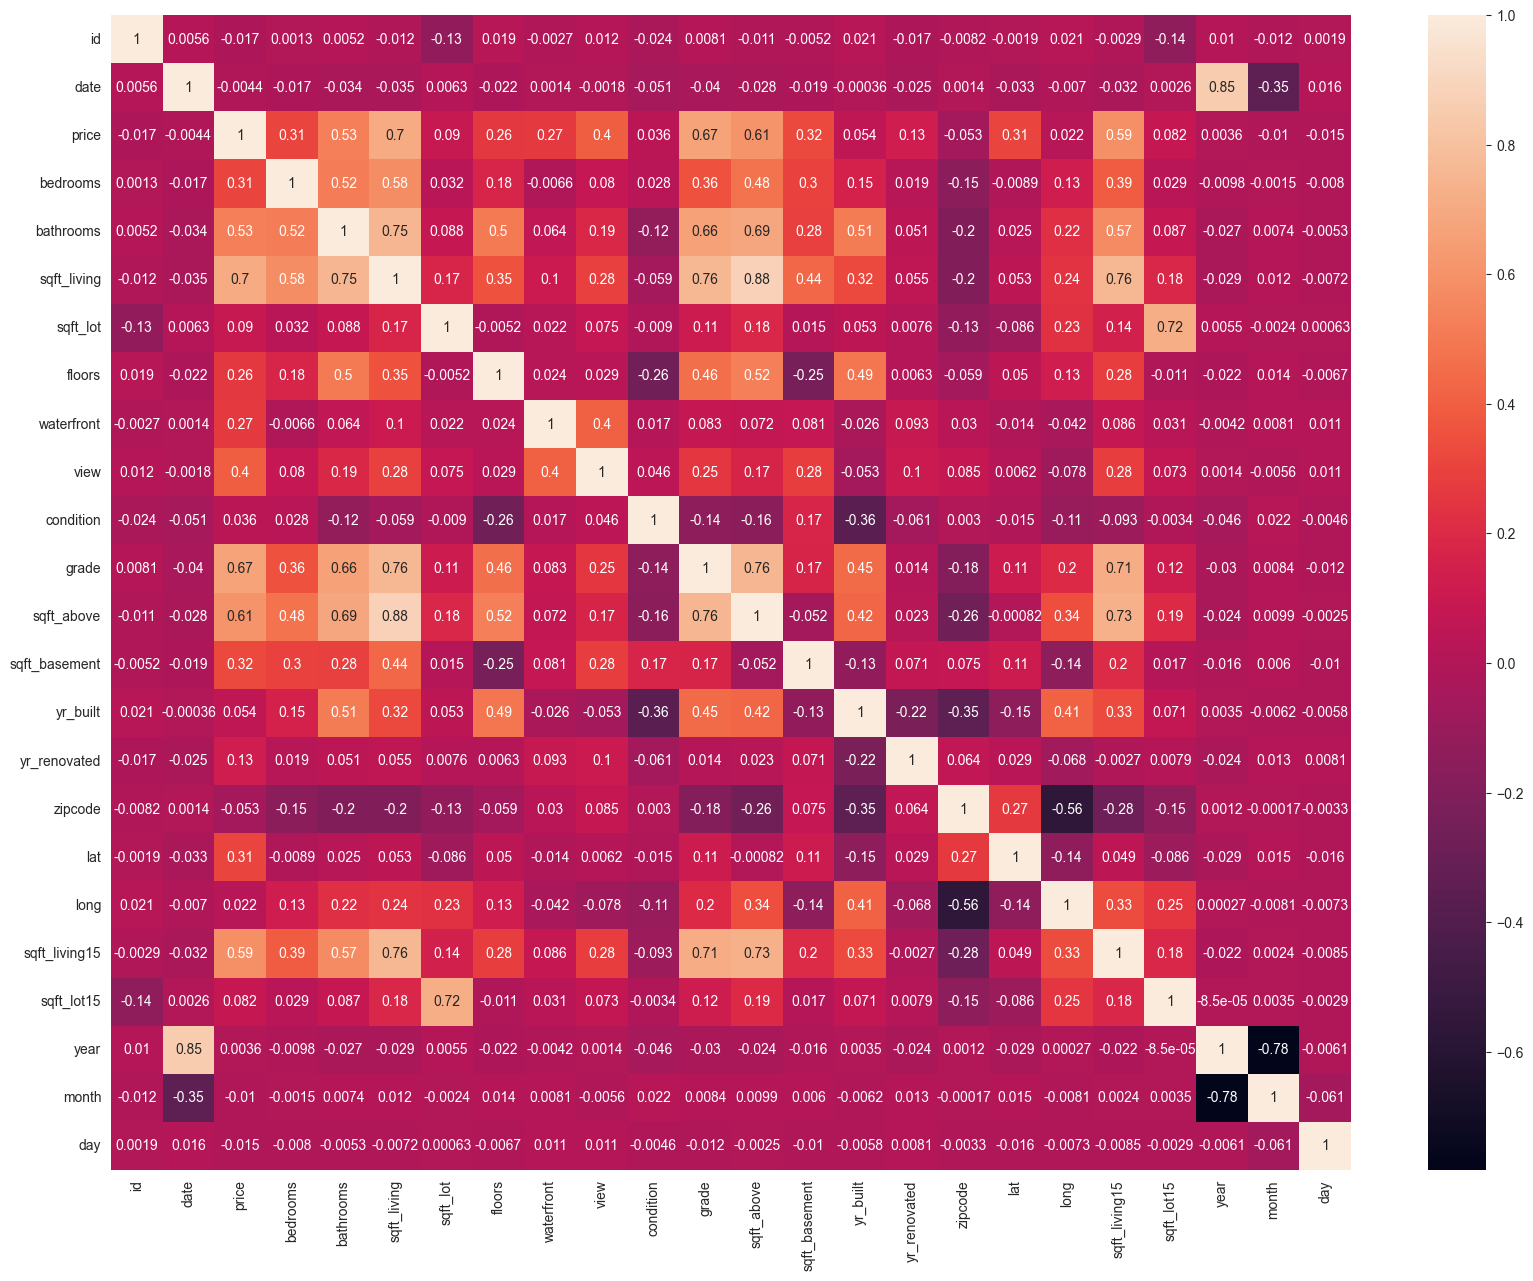

In [8]:
# Now calculate the correlation matrix
cormap = raw_data.corr()

# Plot the heatmap
plt.figure(figsize=(20,15))
sns.heatmap(cormap, annot=True)
plt.show()


In [9]:
raw_data.describe(percentiles=[])

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063


In [10]:
drop_cols = ['id']
data = raw_data.drop(drop_cols, axis = 1)
target = data['price']
data = data.drop(['price'], axis = 1)
data.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [11]:
X_train, X_test, y_train, y_test = \
    train_test_split(data, target, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], data.shape[0])
)

train size=17290, test_size=4323, total_size=21613


In [12]:
X_train.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
year                      int32
month                     int32
day                       int32
dtype: object

In [13]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

data = data.drop("date",axis=1)

data.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [15]:
X_train, X_test, y_train, y_test = \
    train_test_split(data, target, random_state=42, train_size=0.8, shuffle=True)
print ("train size={}, test_size={}, total_size={}".format(
    X_train.shape[0], X_test.shape[0], data.shape[0])
)

train size=17290, test_size=4323, total_size=21613


In [16]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model without normalize parameter
model = LinearRegression()
model.fit(X_train, y_train)

# Print the number of features and coefficients
print("num_ftrs = {}, num_coeff = {} ".format(X_train.shape[1], len(model.coef_)))

# Create a dictionary of coefficients
reg_coeff = dict(zip(X_train.columns, model.coef_))

# Print the coefficients
print(reg_coeff)


num_ftrs = 21, num_coeff = 21 
{'bedrooms': -34500.24445706282, 'bathrooms': 44645.781726288515, 'sqft_living': 109.07588480156329, 'sqft_lot': 0.0858748177435199, 'floors': 7520.144434629252, 'waterfront': 563025.9976795531, 'view': 53411.7430836177, 'condition': 25847.317823302295, 'grade': 94723.86932729621, 'sqft_above': 70.02501811474303, 'sqft_basement': 39.0508663248886, 'yr_built': -2675.52983289856, 'yr_renovated': 21.63912858628549, 'zipcode': -553.7085355964559, 'lat': 598270.5352007034, 'long': -195001.85652631245, 'sqft_living15': 21.347778580901366, 'sqft_lot15': -0.3273776851783623, 'year': 36199.60523861755, 'month': 1139.200265856944, 'day': -347.9048218129901}


In [17]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,...,1983,0,98042,47.3670,-122.152,2750,13095,2014,5,27
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,...,1929,0,98118,47.5520,-122.290,1270,5000,2015,3,10
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,...,1942,0,98146,47.4838,-122.335,1170,7800,2015,2,26
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,...,1977,0,98031,47.3951,-122.172,1800,7350,2015,1,8
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,...,2007,0,98034,47.7043,-122.209,2090,10454,2015,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3,1.50,1000,6914,1.0,0,0,3,7,1000,...,1947,0,98125,47.7144,-122.319,1000,6947,2014,11,13
21575,3,2.50,3087,5002,2.0,0,0,3,8,3087,...,2014,0,98023,47.2974,-122.349,2927,5183,2014,11,11
5390,3,2.50,2120,4780,2.0,0,0,3,7,2120,...,2004,0,98053,47.6810,-122.032,1690,2650,2014,9,30
860,1,0.75,380,15000,1.0,0,0,3,5,380,...,1963,0,98168,47.4810,-122.323,1170,15000,2014,6,20


In [18]:
X_test


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
735,4,2.25,2070,8893,2.0,0,0,4,8,2070,...,1986,0,98058,47.4388,-122.162,2390,7700,2014,10,6
2830,5,3.00,2900,6730,1.0,0,0,5,8,1830,...,1977,0,98115,47.6784,-122.285,2370,6283,2014,8,21
4106,4,2.50,3770,10893,2.0,0,2,3,11,3770,...,1997,0,98006,47.5646,-122.129,3710,9685,2014,8,15
16218,3,3.50,4560,14608,2.0,0,2,3,12,4560,...,1990,0,98034,47.6995,-122.228,4050,14226,2015,3,31
19964,3,2.50,2550,5376,2.0,0,0,3,9,2550,...,2004,0,98052,47.6647,-122.083,2250,4050,2014,7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,3,1.75,1250,7710,1.0,0,0,4,7,1250,...,1947,0,98155,47.7623,-122.317,1340,7710,2014,11,10
20377,3,2.75,2830,3496,2.0,0,0,3,8,2830,...,2012,0,98029,47.5606,-122.011,2160,3501,2014,7,8
8805,4,2.50,2434,4400,2.0,0,0,3,8,2434,...,2007,0,98001,47.2874,-122.283,2434,4400,2014,10,16
10168,4,1.75,2250,10108,1.0,0,0,4,8,2250,...,1967,0,98008,47.5922,-122.118,2050,9750,2014,12,1


Quality Test 39097299121.54099
Quality Control 44951491944.92907


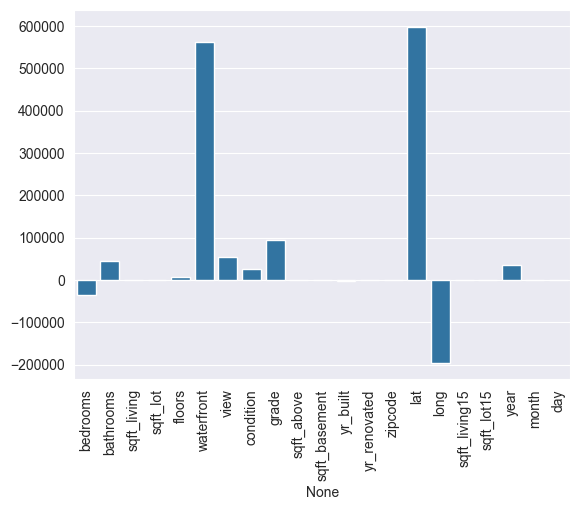

In [19]:
y_pred_train = model.predict(X_train)
print("Quality Test {}".format(mean_squared_error(y_train, y_pred_train)))
y_pred = model.predict(X_test)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

sns.barplot(x = X_train.columns, y=model.coef_)
plt.xticks(rotation=90);


In [20]:
print("Linear regression r2 score: ", r2_score(y_test,y_pred))

Linear regression r2 score:  0.702655976083444


In [22]:
from sklearn.preprocessing import StandardScaler
X_train_scale = pd.DataFrame(StandardScaler().fit_transform(X_train), columns = X_train.columns)
X_train_scale.set_index(X_train.index, inplace = True)
X_test_scale = pd.DataFrame(StandardScaler().fit_transform(X_test), columns = X_test.columns)
X_test_scale.set_index(X_test.index, inplace = True)

In [23]:
X_train_scale.mean()

bedrooms        -7.433165e-17
bathrooms       -1.436291e-16
sqft_living     -1.800500e-16
sqft_lot        -2.383544e-17
floors           2.434914e-17
waterfront       2.342449e-17
view            -2.999978e-17
condition        3.279428e-16
grade           -2.473954e-16
sqft_above      -1.173279e-16
sqft_basement   -5.270509e-17
yr_built        -5.178044e-16
yr_renovated     4.561610e-17
zipcode          1.294573e-13
lat             -1.586865e-14
long             3.110535e-14
sqft_living15   -3.739699e-17
sqft_lot15       2.424640e-17
year            -1.969250e-13
month           -1.068485e-17
day              1.664371e-17
dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_norm = LinearRegression()

# Fit the model on the scaled training features and target
model_norm.fit(X_train_scale, y_train)

# Map the coefficients back to the original feature names using a dictionary
reg_coeff_norm = dict(zip(data.columns, model_norm.coef_))

# Print the coefficients
print(reg_coeff_norm)



{'bedrooms': -33433.1565079178, 'bathrooms': 34662.99444669568, 'sqft_living': 1.7036482071706716e+18, 'sqft_lot': 3078.5596873449153, 'floors': 3224.107073148764, 'waterfront': 47696.46942173409, 'view': 40830.17025136302, 'condition': 17422.500940855996, 'grade': 110497.39568868378, 'sqft_above': -1.5427811057645036e+18, 'sqft_basement': -8.238050611363807e+17, 'yr_built': -78987.32317055353, 'yr_renovated': 8927.782796533029, 'zipcode': -29357.37475724234, 'lat': 82486.1234654221, 'long': -26753.51067367838, 'sqft_living15': 14987.678986198896, 'sqft_lot15': -8840.240316090534, 'year': 16538.597915594168, 'month': 3183.1560832440073, 'day': -2993.8354348144726}


Quality Test 39091653562.12822
Quality Control 1.0896203734093534e+33


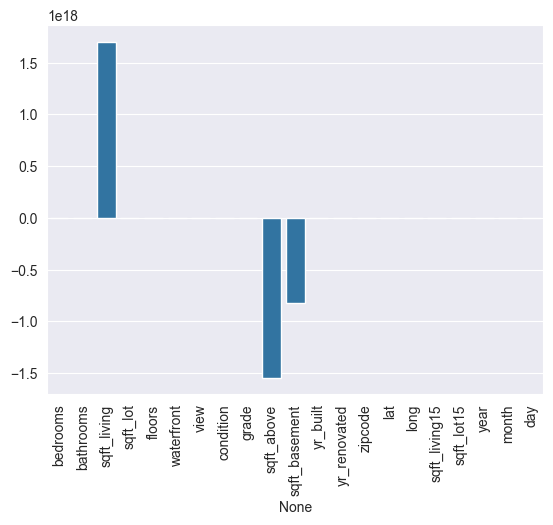

In [25]:
y_pred_train = model_norm.predict(X_train_scale)
print("Quality Test {}".format(mean_squared_error(y_train, y_pred_train)))
y_pred = model_norm.predict(X_test_scale)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

sns.barplot(x = X_train_scale.columns, y=model_norm.coef_)
plt.xticks(rotation=90);

In [26]:
print("Linear regression w/ normalization r2 score: ", r2_score(y_test,y_pred))

Linear regression w/ normalization r2 score:  -7.207594060902948e+21


In [27]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train_scale, y_train)
reg_coeff_ridge = dict(zip(data.columns, ridge_model.coef_))
print(reg_coeff_ridge)

{'bedrooms': -32128.75958789778, 'bathrooms': 34231.926353384384, 'sqft_living': 80176.73625449998, 'sqft_lot': 3335.2906643394404, 'floors': 4082.8431019206937, 'waterfront': 47508.34549092063, 'view': 40685.175951161145, 'condition': 16844.915141368525, 'grade': 110851.13806147473, 'sqft_above': 74538.90994864752, 'sqft_basement': 26214.613253363932, 'yr_built': -78747.69963437332, 'yr_renovated': 8624.31986078802, 'zipcode': -29523.000510807975, 'lat': 82815.60757075783, 'long': -27396.203980082777, 'sqft_living15': 14548.03533466826, 'sqft_lot15': -9010.19860852072, 'year': 16909.75616013106, 'month': 3544.570770496332, 'day': -3005.0851427641323}


Quality Test 39097299176.518036
Quality Control 45491113358.28032


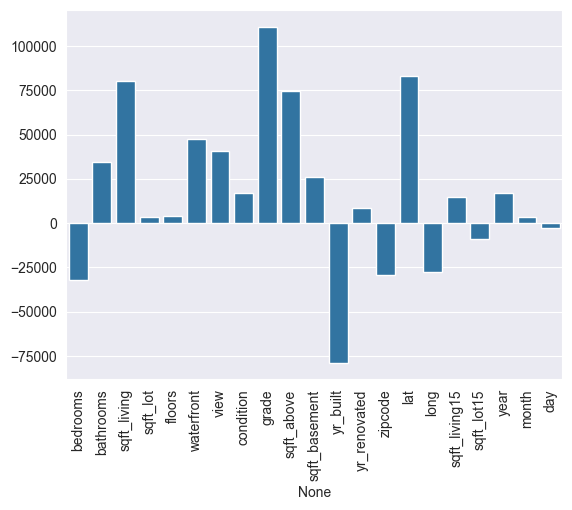

In [28]:
y_pred_train = ridge_model.predict(X_train_scale)
print("Quality Test {}".format(mean_squared_error(y_train, y_pred_train)))
y_pred = ridge_model.predict(X_test_scale)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

sns.barplot(x = X_train_scale.columns, y=ridge_model.coef_)
plt.xticks(rotation=90);

In [29]:
print("Ridge regression r2 score: ", r2_score(y_test,y_pred))

Ridge regression r2 score:  0.69908650162342


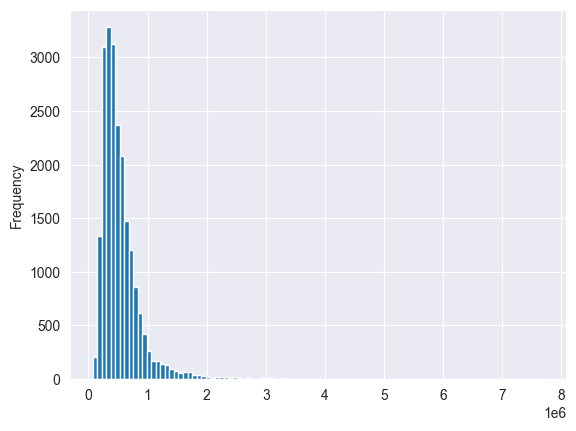

In [30]:
target.plot.hist(bins=100);

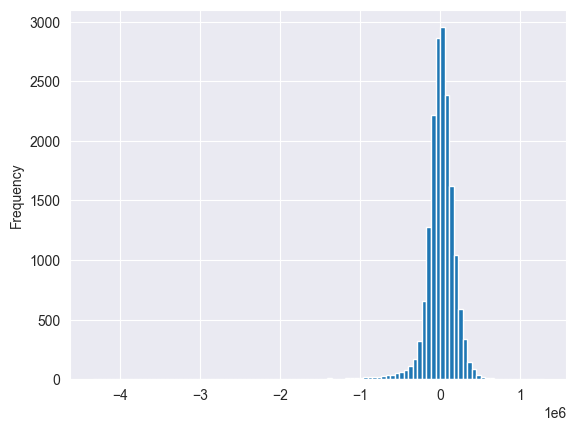

In [31]:
resudal_vec = y_pred_train - y_train
resudal_vec.plot.hist(bins=100);

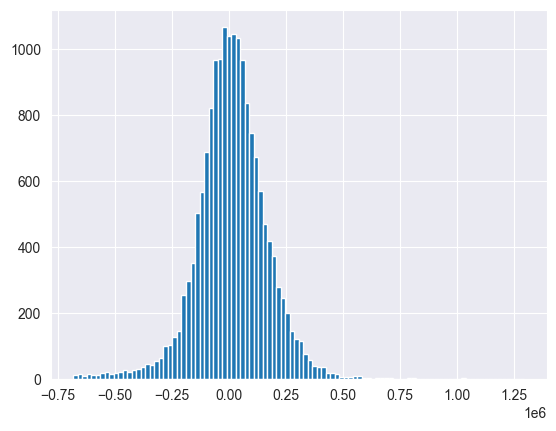

In [32]:
filter_outlier = resudal_vec > resudal_vec.quantile(q=0.01)
resudal_vec[filter_outlier].hist(bins=100);

In [33]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_norm = LinearRegression()

# Fit the model on the scaled training features without outliers and target
model_norm.fit(X_train_scale[filter_outlier], y_train[filter_outlier])

# Map the coefficients back to the original feature names using a dictionary
reg_coeff_norm = dict(zip(data.columns, model_norm.coef_))

# Print the coefficients
print(reg_coeff_norm)


{'bedrooms': -20803.247180516177, 'bathrooms': 25704.840080499387, 'sqft_living': 53305.5782203318, 'sqft_lot': 6544.708157668917, 'floors': 15135.571726802844, 'waterfront': 30309.14552336947, 'view': 36645.21804978796, 'condition': 18822.710654554274, 'grade': 107825.71436826774, 'sqft_above': 46997.71224163886, 'sqft_basement': 22222.21150407281, 'yr_built': -68565.96532253196, 'yr_renovated': 8290.584514141998, 'zipcode': -19984.28670280327, 'lat': 79231.66362231266, 'long': -15362.898427871301, 'sqft_living15': 26484.665092112267, 'sqft_lot15': -6764.49403458256, 'year': 15152.482438985735, 'month': 2948.5873419696327, 'day': -1488.175024176261}


Quality Test 22210651084.222847
Quality Control 50495473562.161575


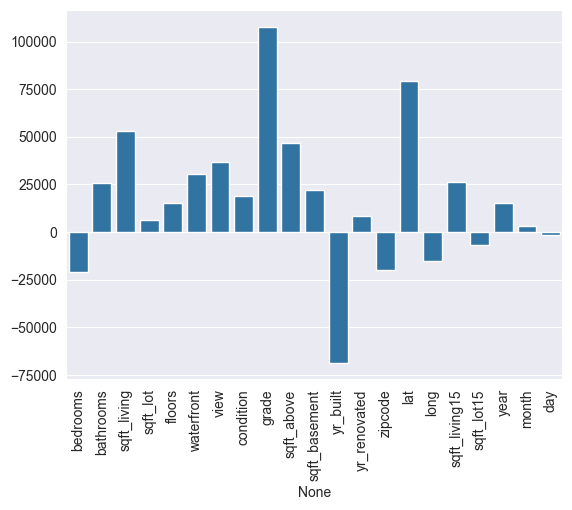

In [34]:
y_pred_train = model_norm.predict(X_train_scale[filter_outlier])
print("Quality Test {}".format(mean_squared_error(y_train[filter_outlier], y_pred_train)))
y_pred = model_norm.predict(X_test_scale)
print("Quality Control {}".format(mean_squared_error(y_test, y_pred)))

sns.barplot(x = X_train_scale.columns, y=model_norm.coef_)
plt.xticks(rotation=90);

In [36]:
print("Linear regression without outliers r2 score: ",r2_score(y_test,y_pred))

Linear regression without outliers r2 score:  0.6659837827643234


In [37]:
compare = pd.DataFrame({'Model/Experiments': ["Linear Regression", "Linear Regression with Normalization", 
                                  "Ridge Regression", "Linear Regression without Outliers"], 
                        'R2 Score': [0.7026, 0.6991, 0.6991, 0.6659]})
compare.sort_values(by='R2 Score', ascending=False)


,Model/Experiments,R2 Score
0,Linear Regression,0.7026
1,Linear Regression with Normalization,0.6991
2,Ridge Regression,0.6991
3,Linear Regression without Outliers,0.6659
